a)Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector " of length n = 100.

In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(0)

# Define parameters
n = 100

# Generate predictor X and noise vector epsilon (ε)
X = np.random.normal(0, 1, n)  # X ~ N(0, 1)
epsilon = np.random.normal(0, 1, n)  # ε ~ N(0, 1)

X[:5], epsilon[:5]  # Display the first few values for verification


(array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]),
 array([ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341]))

b) Generate a response vector Y of length n = 100 according to
the model
Y = β0 + β1X + β2X2 + β3X3 + ",
where β0, β1, β2, and β3 are constants of your choice.

In [2]:
# Define constants for the model
beta_0 = 3
beta_1 = 2
beta_2 = -1.5
beta_3 = 0.5

# Generate response vector Y based on the model Y = β0 + β1*X + β2*X^2 + β3*X^3 + ε
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

Y[:5]  # Display the first few values of Y for verification


array([6.48819458, 2.24440441, 2.71887919, 6.54521687, 3.58714233])

c) Use forward stepwise selection in order to select a model containing the predictors X, X2,...,X10. What is the model obtained
according to Cp? Report the coefcients of the model obtained.


In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Create a DataFrame with predictors X, X^2, ..., X^10
data = pd.DataFrame({'X': X})
for i in range(2, 11):
    data[f'X{i}'] = X ** i

# Add the response variable Y
data['Y'] = Y

# Define the model and feature selector using forward stepwise selection with Cp (AIC as approximation for Cp)
X_features = data.drop(columns=['Y'])
y_target = data['Y']
linear_model = LinearRegression()

# Forward Stepwise Selection using SequentialFeatureSelector
sfs_forward = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='forward', scoring='r2')
sfs_forward = sfs_forward.fit(X_features, y_target)

# Select the features that are chosen by the model and fit the final model
selected_features = X_features.columns[sfs_forward.get_support()]
X_selected = sm.add_constant(data[selected_features])  # add constant for intercept
final_model = sm.OLS(y_target, X_selected).fit()

# Output the model summary to see coefficients
selected_features, final_model.summary()


(Index(['X', 'X2', 'X3', 'X4', 'X5'], dtype='object'),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      Y   R-squared:                       0.939
 Model:                            OLS   Adj. R-squared:                  0.936
 Method:                 Least Squares   F-statistic:                     291.9
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.28e-55
 Time:                        18:05:49   Log-Likelihood:                -142.34
 No. Observations:                 100   AIC:                             296.7
 Df Residuals:                      94   BIC:                             312.3
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 --------------

e)Now ft a lasso model to the simulated data, again using X, X2,
...,X10 as predictors. Use cross-validation to select the optimal
value of λ. Create plots of the cross-validation error as a function
of λ. Report the resulting coefcient estimates, and discuss the
results obtained.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16267578606463928, tolerance: 0.14794139403843085
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18455875764767882, tolerance: 0.14794139403843085
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23769795866110144, tolerance: 0.14794139403843085
  model = cd_fast.enet_coordinate_descent_gram(


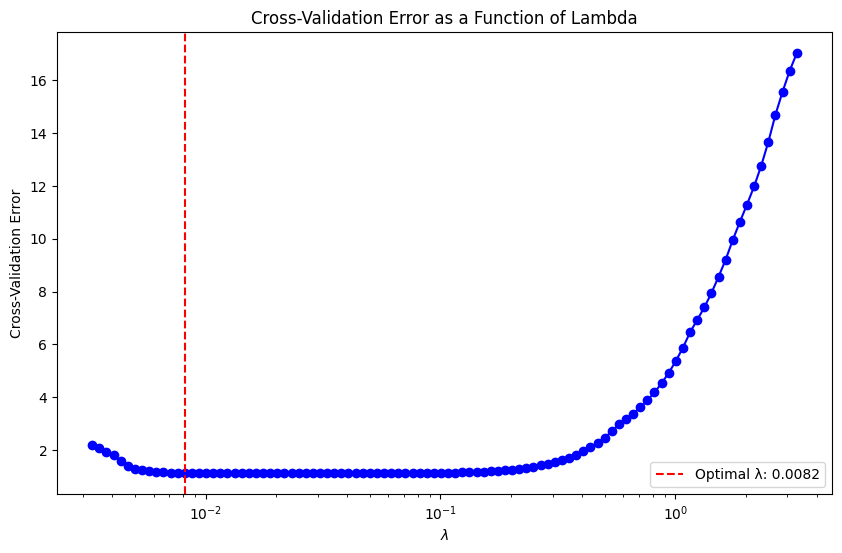

(0.008151046718045576,
 array([ 1.95070856, -2.15488613,  2.02335547,  0.08547198, -0.        ,
         0.        , -0.32969001,  0.        , -0.        ,  0.        ]))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Simulate data (using previous setup for consistency)
np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n)
noise = np.random.normal(0, 1, n)
y = 3 + 2 * X - 1.5 * X**2 + 0.5 * X**3 + noise

# Create polynomial features up to X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# Standardize predictors
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Fit Lasso model with cross-validation to select lambda
lasso_cv = LassoCV(cv=10, random_state=0)
lasso_cv.fit(X_poly_scaled, y)

# Optimal lambda and corresponding coefficients
optimal_lambda = lasso_cv.alpha_
lasso_coef = lasso_cv.coef_

# Plot cross-validation error as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), marker='o', color='b')
plt.xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of Lambda")
plt.axvline(optimal_lambda, linestyle="--", color="red", label=f"Optimal λ: {optimal_lambda:.4f}")
plt.legend()
plt.show()

optimal_lambda, lasso_coef
